# Easy data processing
Using the `Experiment` and `DataRun` class to generalize processing data. General usage:

1. Create an `Experiment`
2. Use the `structured_data` method to extract the parameter of interest
3. Plot

In [1]:
import sys
sys.path.append("../")
import datarun
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [2]:
#If you make a change to datarun.py, run this cell or restart your kernel
import importlib
importlib.reload(datarun)

<module 'datarun' from '/home/ben/Documents/Repos/MOTsArentForKids/MOT_loading_time/../datarun.py'>

In [17]:
d = datarun.Experiment(
    vstart = 20,
    vend = 80,
    vstep = 20, 
    idx_start = 164,
    datapath = "../data/mar30/load_time/",
    numtrials = 20,
    mask = .20
)

|████████████████████████████████████████| 80/80 [100%] in 1:44.5 (0.76/s)      


In [24]:
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))
N_list = d.structure_data(lambda d: d.atom_number_px_sum())

<ErrorbarContainer object of 3 artists>

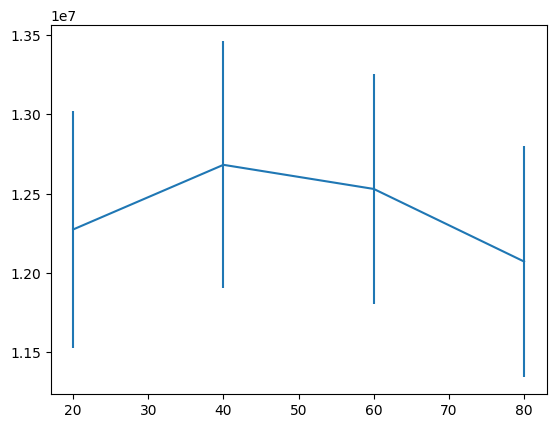

In [29]:
tlist = d.vlist
means = [np.mean(nlist) for nlist in N_list.values()]
errs = [np.std(nlist)/np.sqrt(20) for nlist in N_list.values()]

plt.errorbar(tlist, means, yerr = errs)

## Plot fits

In [1]:
runs = d.structure_data()
runs

NameError: name 'd' is not defined

In [31]:
popt

array([1.79856822e+04, 1.02021614e-01])

In [34]:
np.sqrt(pcov[0][0])

465.42944435559184

In [35]:
np.sqrt(pcov[1][1])

0.005574975118016282

In [37]:
popt[1]/popt[0]

5.672379408046771e-06

In [38]:
np.sqrt((pcov[1][1]/popt[0]**2)+(popt[1]**2/popt[0]**4*pcov[0][0]))

3.4296744603344166e-07